In [4]:
# Paso 0: Importar librerias necesarias

import warnings
warnings.simplefilter('ignore')

import pandas as pd
import numpy as np
import pylab as plt
from pandas.plotting import lag_plot


In [5]:
# Paso 1: Importar el DF de todas las empresas del IBEX 35

df = pd.read_csv('ibex35.csv')

df.head()

,id,ticker,empresa,date,open,high,low,close,adj close,volume
0,1,ANA,Acciona,2019-01-02,73.900002,73.900002,73.900002,73.900002,64.148270,0
1,1,ANA,Acciona,2022-06-24,174.199997,178.800003,174.000000,178.800003,169.562302,0
2,1,ANA,Acciona,2022-06-23,169.899994,173.199997,169.000000,173.000000,164.061951,0
3,1,ANA,Acciona,2022-06-22,171.399994,171.399994,168.800003,170.199997,161.406616,0
4,1,ANA,Acciona,2022-06-21,179.699997,179.699997,172.300003,173.600006,164.630966,0


In [6]:
# Paso 2: Filtrar por la empresa sobre la que realizar el modelo

red = df[df['empresa'] == 'REE']

red.shape

(1316, 10)

In [7]:
# Paso 3: Seleccionar las columnas definitivas que utilizaremos

red = red [['date','open','high','low','close','adj close']]

red.shape

(1316, 6)

In [8]:
# Paso 4: Modificar el formato de columna 'date' (format: object ===> datatime)

red['date'] = pd.to_datetime(red['date'], format="%Y-%m-%d")

red.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1316 entries, 34739 to 36054
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   date       1316 non-null   datetime64[ns]
 1   open       1316 non-null   float64       
 2   high       1316 non-null   float64       
 3   low        1316 non-null   float64       
 4   close      1316 non-null   float64       
 5   adj close  1316 non-null   float64       
dtypes: datetime64[ns](1), float64(5)
memory usage: 72.0 KB


In [9]:
# Paso 5: Ordenar el DF por fecha

red.sort_values(by='date',ascending= True, inplace=True)

red.head()

,date,open,high,low,close,adj close
35297,2019-01-02,19.355000,19.930000,19.315001,19.930000,13.999269
35298,2019-01-03,19.315001,19.834999,19.315001,19.830000,13.929027
35299,2019-01-04,19.639999,19.639999,19.420000,19.549999,13.923827
35300,2019-01-07,19.545000,19.570000,19.445000,19.475000,13.870413
35301,2019-01-08,19.375000,19.434999,19.375000,19.395000,13.813434


In [10]:
# Paso 6: Filtrar nuevamente para eliminar efecto COVID del análisis (previo a 2021)

# Filtro:

fecha_inicio = '2021-01-01'
fecha_fin = '2024-03-01'

red = red[(red['date'] >= fecha_inicio) & (red['date'] <= fecha_fin)]

# Comprobar si se ha aplicado correctamente

red.shape

(811, 6)

In [11]:
# Paso 7: Añadir al DF fechas obviadas por mercado de valores español (fin de semana y festivos)

# Rango de fechas desde '2021-01-01' a '2024-03-01'

date_range = pd.date_range(start=red['date'].min(), end=red['date'].max(), freq='D')

# Reindexa el DF con el nuevo rango de fechas

red = red.set_index('date').reindex(date_range).reset_index()

# Volver a modificar el nombre de columna 'date'

red = red.rename(columns={'index': 'date'})


In [12]:
# Paso 8: Comprobar que ha introducido la fechas ausentes en el DF original

red.head(10)

,date,open,high,low,close,adj close
0,2021-01-04,16.655001,16.655001,16.655001,16.655001,13.080273
1,2021-01-05,16.830000,16.830000,16.480000,16.480000,13.158279
2,2021-01-06,16.400000,16.400000,16.400000,16.400000,13.094404
3,2021-01-07,16.485001,16.525000,16.485001,16.520000,13.190217
4,2021-01-08,16.360001,16.525000,16.360001,16.525000,13.194209
5,2021-01-09,NaN,NaN,NaN,NaN,NaN
6,2021-01-10,NaN,NaN,NaN,NaN,NaN
7,2021-01-11,16.330000,16.330000,16.299999,16.299999,13.014560
8,2021-01-12,16.240000,16.250000,16.000000,16.049999,12.814950
9,2021-01-13,15.915000,16.100000,15.915000,16.100000,12.854875


In [13]:
# Paso 9: Rellenar valores nulos con el anterior valor de la columna(viernes o previo a festivo)

red = red.fillna(method='ffill')

In [14]:
# Paso 10: Comprobar que se han introducido los valores correctamente


red.head(10)

,date,open,high,low,close,adj close
0,2021-01-04,16.655001,16.655001,16.655001,16.655001,13.080273
1,2021-01-05,16.830000,16.830000,16.480000,16.480000,13.158279
2,2021-01-06,16.400000,16.400000,16.400000,16.400000,13.094404
3,2021-01-07,16.485001,16.525000,16.485001,16.520000,13.190217
4,2021-01-08,16.360001,16.525000,16.360001,16.525000,13.194209
5,2021-01-09,16.360001,16.525000,16.360001,16.525000,13.194209
6,2021-01-10,16.360001,16.525000,16.360001,16.525000,13.194209
7,2021-01-11,16.330000,16.330000,16.299999,16.299999,13.014560
8,2021-01-12,16.240000,16.250000,16.000000,16.049999,12.814950
9,2021-01-13,15.915000,16.100000,15.915000,16.100000,12.854875


In [15]:
# Paso 11: Establecer columna 'date' como índice para modelo

red = red.set_index('date')

red.head(10)

,open,high,low,close,adj close
date,,,,,
2021-01-04,16.655001,16.655001,16.655001,16.655001,13.080273
2021-01-05,16.830000,16.830000,16.480000,16.480000,13.158279
2021-01-06,16.400000,16.400000,16.400000,16.400000,13.094404
2021-01-07,16.485001,16.525000,16.485001,16.520000,13.190217
2021-01-08,16.360001,16.525000,16.360001,16.525000,13.194209
2021-01-09,16.360001,16.525000,16.360001,16.525000,13.194209
2021-01-10,16.360001,16.525000,16.360001,16.525000,13.194209
2021-01-11,16.330000,16.330000,16.299999,16.299999,13.014560
2021-01-12,16.240000,16.250000,16.000000,16.049999,12.814950


In [16]:
# Paso 12: Establecer siguiente criterio para que el modelo AR funcione

red.index = pd.DatetimeIndex(red.index).to_period('d')

<Axes: xlabel='y(t)', ylabel='y(t + 1)'>

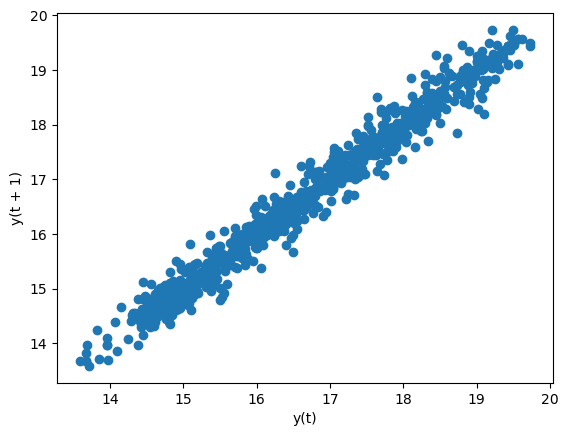

In [17]:
# Paso 13: Comprobar linealidad de la variable y = 'close'

lag_plot(red.close)

In [18]:
# Paso 14: Importar modelo de AR

from statsmodels.tsa.ar_model import AutoReg as AR

In [19]:
# Paso 15: Realizar el split en el DF del train y el test

train, test = red.close[:-10], red.close[-10:]

train.shape, test.shape

((1143,), (10,))

In [20]:
# Paso 16: Entrenar el modelo de AR

modelo = AR(train, lags=1).fit()

In [21]:
# Paso 17: Realizar predicción con el entrenamiento

pred = modelo.predict(len(train), len(red.close)-1)

# Check sobre los valores de la predicción

pred

2024-02-21    14.765943
2024-02-22    14.781726
2024-02-23    14.797351
2024-02-24    14.812820
2024-02-25    14.828134
2024-02-26    14.843295
2024-02-27    14.858304
2024-02-28    14.873162
2024-02-29    14.887872
2024-03-01    14.902435
Freq: D, dtype: float64

In [22]:
# Paso 18: Chequear coincidencia entre test y pred

test

date
2024-02-21    15.070
2024-02-22    14.705
2024-02-23    14.880
2024-02-24    14.880
2024-02-25    14.880
2024-02-26    14.680
2024-02-27    14.775
2024-02-28    14.495
2024-02-29    14.480
2024-03-01    14.860
Freq: D, Name: close, dtype: float64

In [23]:
# Paso 19: Calcular el error de la predicción sobre la realidad

error = (pred - test).abs().sum()/len(pred)  

error

0.1657546517997389

In [24]:
# Paso 20: Generar un DF sobre la comparativa en realidad, predicción y error

res=pd.DataFrame({'real': test, 'pred': pred, 'error': pred - test})

res

,real,pred,error
2024-02-21,15.070,14.765943,-0.304057
2024-02-22,14.705,14.781726,0.076726
2024-02-23,14.880,14.797351,-0.082649
2024-02-24,14.880,14.812820,-0.067180
2024-02-25,14.880,14.828134,-0.051866
2024-02-26,14.680,14.843295,0.163295
2024-02-27,14.775,14.858304,0.083304
2024-02-28,14.495,14.873162,0.378162
2024-02-29,14.480,14.887872,0.407872
2024-03-01,14.860,14.902435,0.042435
